In [4]:
import tensorflow as tf
from prepare_dataset import create_dataset_from_path

## Load Dataset

In [5]:
# create (image, label) dataset from generator
train_ds = create_dataset_from_path('samples/train/*.jpg', batch_size=128, image_size=(60, 120))
test_ds = create_dataset_from_path('samples/test/*.jpg', batch_size=128, image_size=(60, 120))

## Create Model

In [6]:
def CNN_multi_outputs(image_shape, n_labels=4, n_class=26, name='captcha', output_label='labels'):
    # input
    image_input = tf.keras.Input(shape=image_shape, name='input_image')

    # conv layer 1
    x = tf.keras.layers.Conv2D(64, (11, 23), padding='same')(image_input)
    x = tf.keras.layers.MaxPool2D((4, 4), padding='same')(x)

    # conv layer 2
    x = tf.keras.layers.Conv2D(32, (5, 11), padding='same')(x)
    x = tf.keras.layers.MaxPool2D((4, 4), padding='same')(x)

    # # conv layer 3
    # x = tf.keras.layers.Conv2D(128, (3, 3), padding='same')(x)

    # # conv layer 4
    # x = tf.keras.layers.Conv2D(128, (3, 3), padding='same')(x)

    # # conv layer 5
    # x = tf.keras.layers.Conv2D(64, (3, 7), padding='same')(x)
    # x = tf.keras.layers.MaxPool2D((2, 2), padding='same')(x)

    # dense layer 1
    x = tf.keras.layers.Flatten()(x) # flatten
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    # # dense layer 2
    # x = tf.keras.layers.Dense(128, activation='relu')(x)
    # x = tf.keras.layers.Dropout(0.5)(x)

    # outputs
    labels = [tf.keras.layers.Dense(n_class, name=f'{output_label}_{i}')(x) for i in range(n_labels)] 

    # build model
    model = tf.keras.Model(inputs=image_input, outputs=labels, name=name)
    
    return model

In [7]:
image_shape = (60, 120, 1)
n_labels = 4
n_class = 26

model = CNN_multi_outputs(image_shape, n_labels, n_class, name='cnn_multi_outputs', output_label='labels')
model.summary()

Model: "cnn_multi_outputs"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 60, 120, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 60, 120, 64)  16256       input_image[0][0]                
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 15, 30, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 15, 30, 32)   112672      max_pooling2d[0][0]              
__________________________________________________________________________________

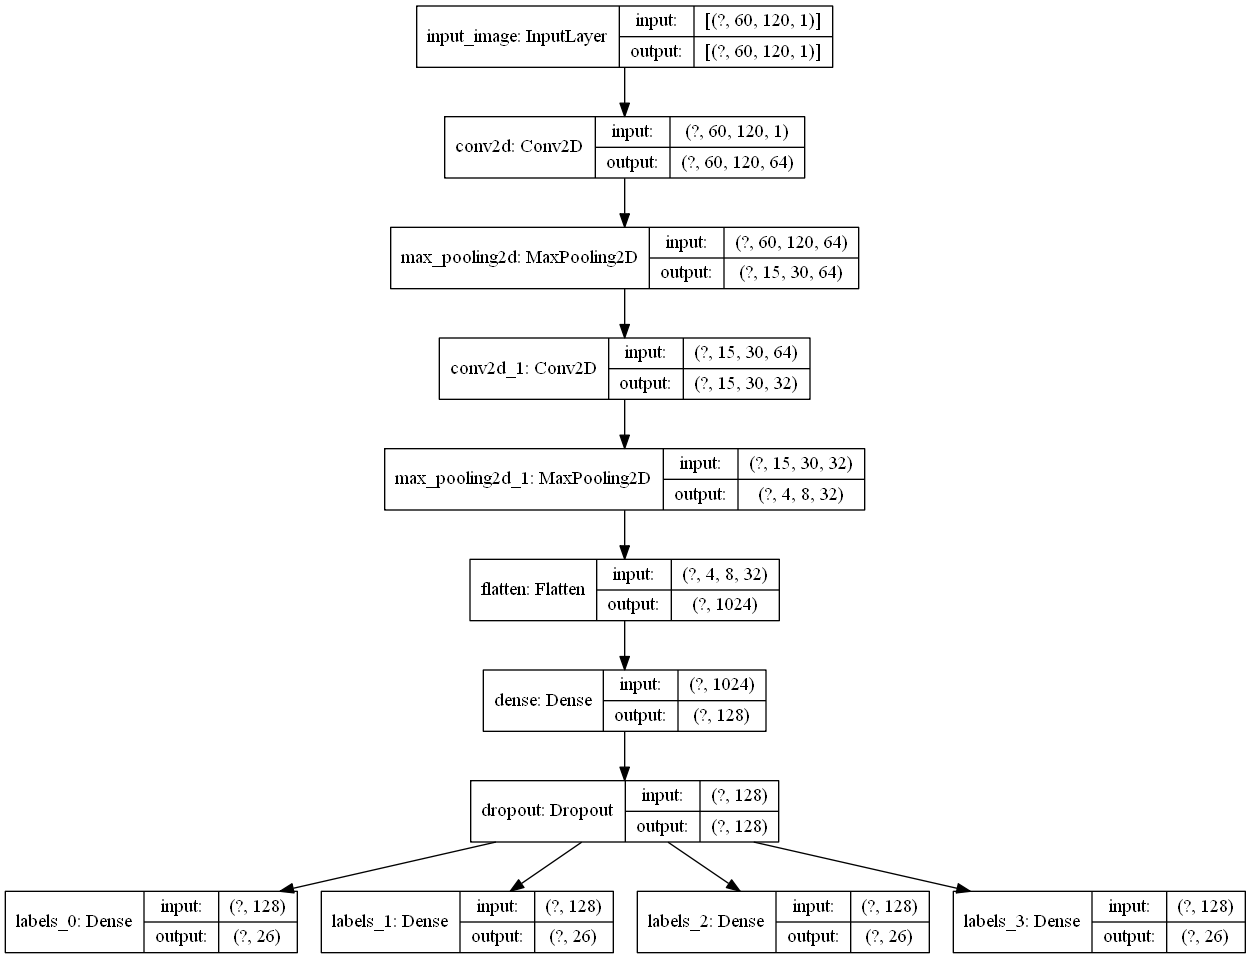

In [8]:
tf.keras.utils.plot_model(model, 'cnn_multi_outputs.png', show_shapes=True)

## Train Model

In [9]:
# set loss for each output lables, or set a same loss for all labels
# e.g. loss={ f'labels_{i}': 
#   tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) for i in range(n_labels)}
model.compile(optimizer=tf.keras.optimizers.Adadelta(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
import os
callbacks = [
    # Write TensorBoard logs to `./logs` directory
    tf.keras.callbacks.TensorBoard(log_dir=os.path.join('tensorboard')) # start visualization: tensorboard --logdir mylogdir
]

model.fit(train_ds, epochs=1, callbacks=callbacks)

Train for 341 steps
133/341 [==========>...................] - ETA: 4:42 - loss: 13.1085 - labels_0_loss: 3.2678 - labels_1_loss: 3.2896 - labels_2_loss: 3.2805 - labels_3_loss: 3.2706 - labels_0_accuracy: 0.0445 - labels_1_accuracy: 0.0428 - labels_2_accuracy: 0.0353 - labels_3_accuracy: 0.0379

## Test and Prediction